In [23]:
from PIL import Image
import cv2
import numpy as np
import math

In [24]:
import urllib.request
urllib.request.urlretrieve('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQF40YvvYRMjUxVPvOODabz88xJt0L9rRWFbUvDquXHMEwxnOK5Sr96JDEnrftX-kTijT8&usqp=CAU',"image_1.jpg") 

('image_1.jpg', <http.client.HTTPMessage at 0x1426525fd30>)

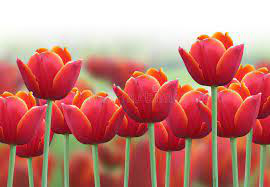

In [25]:
Im = Image.open("image_1.jpg")
Im

In [26]:
image = np.array(Im)
new_h = 200
new_w = 400
old_h, old_w, c = image.shape
resized_im = np.zeros((new_h, new_w, c))
print(f'Original Image Dimensions are height: {old_h}, width: {old_w}, No. of channels: {c}')

Original Image Dimensions are height: 187, width: 270, No. of channels: 3


In [27]:
w_scale_factor = old_w/ new_w  if new_w != 0 else 0
h_scale_factor = old_h/ new_h  if new_h != 0 else 0
print(f'horizontal and vertical scale factors: {w_scale_factor}, {h_scale_factor}')

horizontal and vertical scale factors: 0.675, 0.935


In [29]:
for i in range(new_h):
	for j in range(new_w):
		#map the coordinates back to the original image
		x = i * h_scale_factor
		y = j * w_scale_factor
		#calculate the coordinate values for 4 surrounding pixels.
		x_floor = math.floor(x) # math.floor rounds DOWN to nearest integer of the value we pass
		x_ceil = min( old_h - 1, math.ceil(x)) # math.floor rounds UP to the nearest integer of the value we pass 
		y_floor = math.floor(y)
		y_ceil = min(old_w - 1, math.ceil(y))
		#When both x and y are integers, it means that the coordinates of a pixel in the
        #resized image coincide with a particular pixel of the original image
		if (x_ceil == x_floor) and (y_ceil == y_floor):
			q = image[int(x), int(y), :]
                
		#When either one is an integer, bilinear interpolation turns into linear interpolation
		elif (x_ceil == x_floor):
			q1 = image[int(x), int(y_floor), :]
			q2 = image[int(x), int(y_ceil), :]
			q = q1 * (y_ceil - y) + q2 * (y - y_floor)
		elif (y_ceil == y_floor):
			q1 = image[int(x_floor), int(y), :]
			q2 = image[int(x_ceil), int(y), :]
			q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
		else:
			v1 = image[x_floor, y_floor, :]
			v2 = image[x_ceil, y_floor, :]
			v3 = image[x_floor, y_ceil, :]
			v4 = image[x_ceil, y_ceil, :]

			q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
			q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
			q = q1 * (y_ceil - y) + q2 * (y - y_floor)

		resized_im[i,j,:] = q

cv2.imshow("output image", resized_im)
cv2.waitKey(0)

TypeError: Cannot handle this data type: (1, 1, 3), <f8